In [41]:
# String Operations
import pandas as pd

weather_df = pd.read_csv("weather.csv", parse_dates=True, index_col="Date/Time")
weather_df

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


<AxesSubplot:xlabel='Date/Time'>

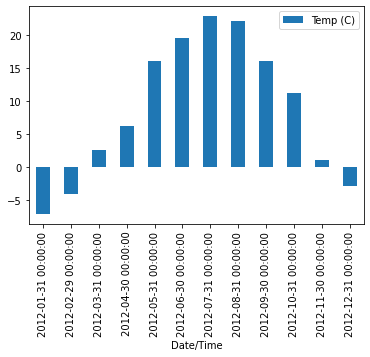

In [67]:
# Using resample and calculate median by month
w = weather_df[["Temp (C)"]].copy()
w.resample("M").apply("median").plot(kind="bar")

<AxesSubplot:xlabel='Date/Time'>

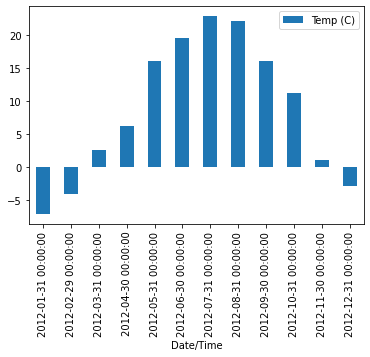

In [68]:
# Using aggregate
w.resample("M").aggregate("median").plot(kind="bar")

<AxesSubplot:xlabel='Month'>

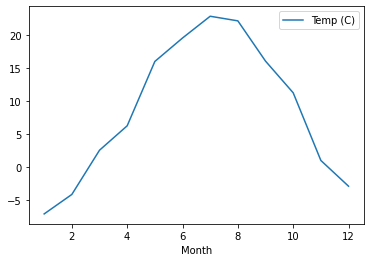

In [75]:
# Manually grouping by month
w.loc[:, "Month"] = w.index.month
w.groupby("Month").aggregate("median").plot()

<AxesSubplot:xlabel='Date/Time'>

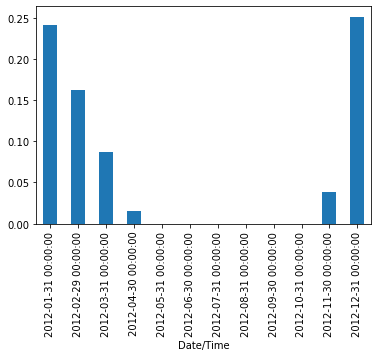

In [99]:
# Converting bool to float and plotting the result
is_snowing = weather_df["Weather"].str.contains("Snow")
is_snowing.astype(float).resample("M").apply("mean").plot(kind="bar")

array([<AxesSubplot:title={'center':'Temperature'}, xlabel='Date/Time'>,
       <AxesSubplot:title={'center':'Snowiness'}, xlabel='Date/Time'>],
      dtype=object)

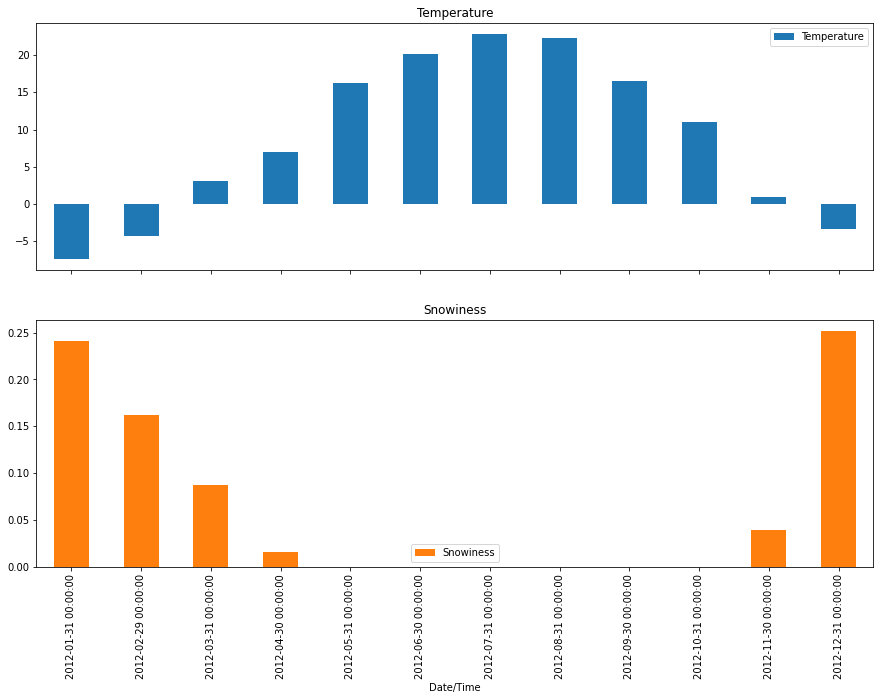

In [107]:
# Combining results
temp = weather_df["Temp (C)"].resample("M").apply("mean")
snowiness = is_snowing.astype(float).resample("M").apply("mean")

# Change col names
temp.name = "Temperature"
snowiness.name  = "Snowiness"

# Axis = 1, means combine columns
res = pd.concat([temp, snowiness], axis=1)

# suplots=True - to separate other column
res.plot(kind="bar", figsize=(15, 10), subplots=True)

In [109]:
# Data cleanup
requests = pd.read_csv('service-requests.csv')
requests

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,26592825,10/30/2013 09:15:59 PM,10/30/2013 11:12:46 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11236.0,1462 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636277,-73.896572,"(40.63627651247757, -73.89657202443081)"
309,26589795,10/30/2013 09:15:01 PM,10/31/2013 01:30:33 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10014.0,182 W 4TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732437,-74.001930,"(40.73243667227844, -74.00193039104539)"
310,26589544,10/30/2013 09:15:00 PM,NaN,DEP,Department of Environmental Protection,Water Conservation,Water Meter Broken/Leaking - Other (CMO),NaN,11220.0,6104 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636149,-74.012474,"(40.6361494299749, -74.01247359045288)"
311,26590715,10/30/2013 09:13:57 PM,10/30/2013 10:27:30 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236.0,705 EAST 96 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651854,-73.911154,"(40.651854386381615, -73.91115428508698)"


In [145]:
# Reading to correct data type and fixing n/a values
request = pd.read_csv("service-requests.csv", na_values=["nan", "NO CLUE", "N/A", '0'])
requests["Incident Zip"].unique()

# changing column data type
requests["Incident Zip"] = request["Incident Zip"].astype(str)
requests.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                          float64
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           